In [2]:
import networkx as nx

For our unit conversions we need to use a directed graph. In particular we need the directed edges of the graph to have weights which correspond to the conversion factor between units. 

For example `1 in = 2.5 cm` corrsponds to `u(in) $\rightarrow^{2.54}$ v(cm)` .

To ensure you have consistent conversion factors throughout your graph, you should programmatically assign the weight to the edge  running in the opposite direction, `v(cm) $\rightarrow^{\frac{1}{2.54}}$ u(in)`.

Below are a few sample conversions being loaded into a graph via list. 

In [30]:
UCg = nx.DiGraph()
UCg.add_weighted_edges_from([('km','m',1000.),
                             ('in','cm',2.54),("m","cm",100),('ft','in',12),
                             ('beard-second','nm', 10),('m','nm',1e9)])

Below is a snippet of code that iterates over the edges of the graph and adds in a edge in the opposite direction with weights $w_{←} = \frac{1}{w_{→}}$.

km m {'weight': 1000.0}
m cm {'weight': 100}
m nm {'weight': 1000000000.0}
m km {'weight': 0.001}
in cm {'weight': 2.54}
cm m {'weight': 0.01}
cm in {'weight': 0.39370078740157477}
ft in {'weight': 12}
beard-second nm {'weight': 10}
nm m {'weight': 1e-09}
nm beard-second {'weight': 0.1}


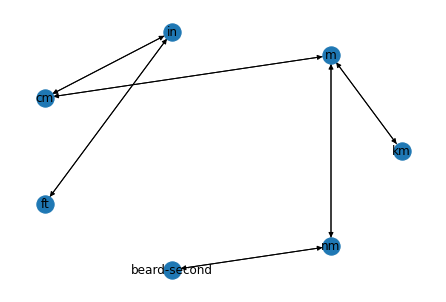

In [31]:
for u,v,d in UCg.edges(data=True):
  print(u,v,d)
  UCg.add_edge(v, u, weight= 1./d['weight'])
nx.draw_circular(UCg, with_labels=True)

In [32]:
path = nx.shortest_path(UCg,'in','beard-second')
path

['in', 'cm', 'm', 'nm', 'beard-second']

Above, a path was found between `in` and `beard-seconds`. 
Notice how it hits several different nodes, but we know there exists a direct conversion. The product of all of the weights $\Pi_i = w_i$ is the conversion factor between the two nodes.

We get access the weight of an edge in several ways. 

In [33]:
UCg['in']['cm']
UCg.get_edge_data('in','cm')

{'weight': 2.54}

Or we can get the weight of the path directly. 

In [36]:
conversion = 1.
for u,v in zip(path[:-1],path[1:]):
  print(UCg[u][v]['weight'])
  conversion *= UCg[u][v]['weight']
#Is it worth doing this inside of the loop? 
UCg.add_edge(path[0],path[-1],weight=conversion)

2.54
0.01
999999999.9999999
0.1


[Does WolframAlpha agree with our conversion?](https://www.wolframalpha.com/input?i=convert+1+inch+to+beard%E2%80%90seconds)

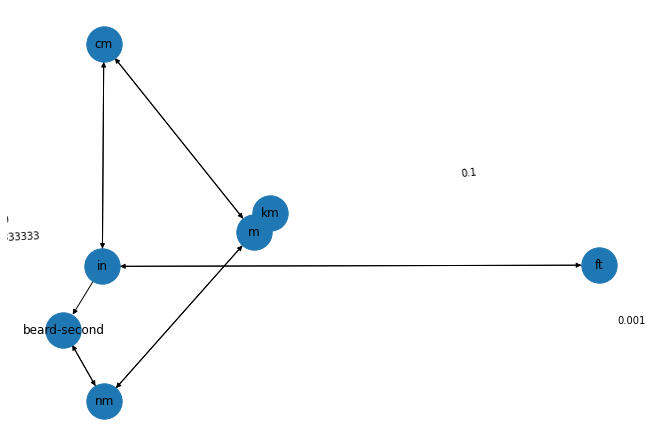

In [52]:
import matplotlib.pyplot as plt

pos=nx.planar_layout(UCg); #crappy choice <- do better
nx.draw(UCg,node_size=1250, with_labels=True)
labels = nx.get_edge_attributes(UCg,'weight') #<- to many numbers format!
nx.draw_networkx_edge_labels(UCg, pos, edge_labels=labels)
plt.gcf().set_size_inches(9,6)
plt.show()

If you add six more measures to the above graph and make it into a complete graph, that would easily get you full marks. 

If you can make the plot even nicer, that would give you bonus points. 